## Comparison of PSO and GA on Benchmark Optimization Functions

This analysis compares **Particle Swarm Optimization (PSO)** and **Genetic Algorithm (GA)** performance on four well-known continuous optimization test functions. The setup uses:
- 👥 100 particles/individuals
- 🔄 1000 iterations
- 📏 5 dimensions
- 📊 Averages results over 4 runs

### 📋 Problem Description
We aim to minimize four different test functions, each with a known global minimum of 0.0 but varying characteristics:
- 🌐 **Sphere**: Simple, unimodal
- 📈 **Rosenbrock**: Unimodal with a narrow valley
- 🌊 **Ackley**: Multimodal with one global minimum
- 🏔️ **Rastrigin**: Highly multimodal with many local minima

**Parameters:**
- Number of particles/individuals: 10
- Number of iterations: 100
- Dimensions: 5
- Runs for averaging: 4

### 🔢 Test Function Formulations

#### 1. Sphere Function 🌐
$ f(x) = \sum_{i=1}^{n} x_i^2 $
- **Domain**: $[-5.12, 5.12]^n$
- **Global minimum**: $f(0,0,...,0) = 0$
- **Characteristics**: Simple, convex, unimodal

#### 2. Rosenbrock Function 📈
$ f(x) = \sum_{i=1}^{n-1} [100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2] $
- **Domain**: $[-5, 10]^n$
- **Global minimum**: $f(1,1,...,1) = 0$
- **Characteristics**: Unimodal, narrow parabolic valley

#### 3. Ackley Function 🌊
$ f(x) = -20\exp\left(-0.2\sqrt{\frac{1}{n}\sum_{i=1}^{n}x_i^2}\right) - \exp\left(\frac{1}{n}\sum_{i=1}^{n}\cos(2\pi x_i)\right) + 20 + e $
- **Domain**: $[-32.768, 32.768]^n$
- **Global minimum**: $f(0,0,...,0) = 0$
- **Characteristics**: Multimodal, many local minima

#### 4. Rastrigin Function 🏔️
$ f(x) = 10n + \sum_{i=1}^{n} [x_i^2 - 10\cos(2\pi x_i)] $
- **Domain**: $[-5.12, 5.12]^n$
- **Global minimum**: $f(0,0,...,0) = 0$
- **Characteristics**: Highly multimodal, regular local minima

### 🎯 Objective
For each function, we:
1. Run PSO and GA separately
2. Measure the average best fitness over 4 runs
3. Compare results to the optimal value (0.0)
4. Analyze both absolute performance and distance from optimum

This setup tests the algorithms' abilities to:
- ✅ Handle simple optimization (Sphere)
- 🧭 Navigate narrow valleys (Rosenbrock)
- 🏃‍♂️ Escape local minima (Ackley, Rastrigin)
- 🎯 Converge to the global optimum in 5D space

### Visualize test function

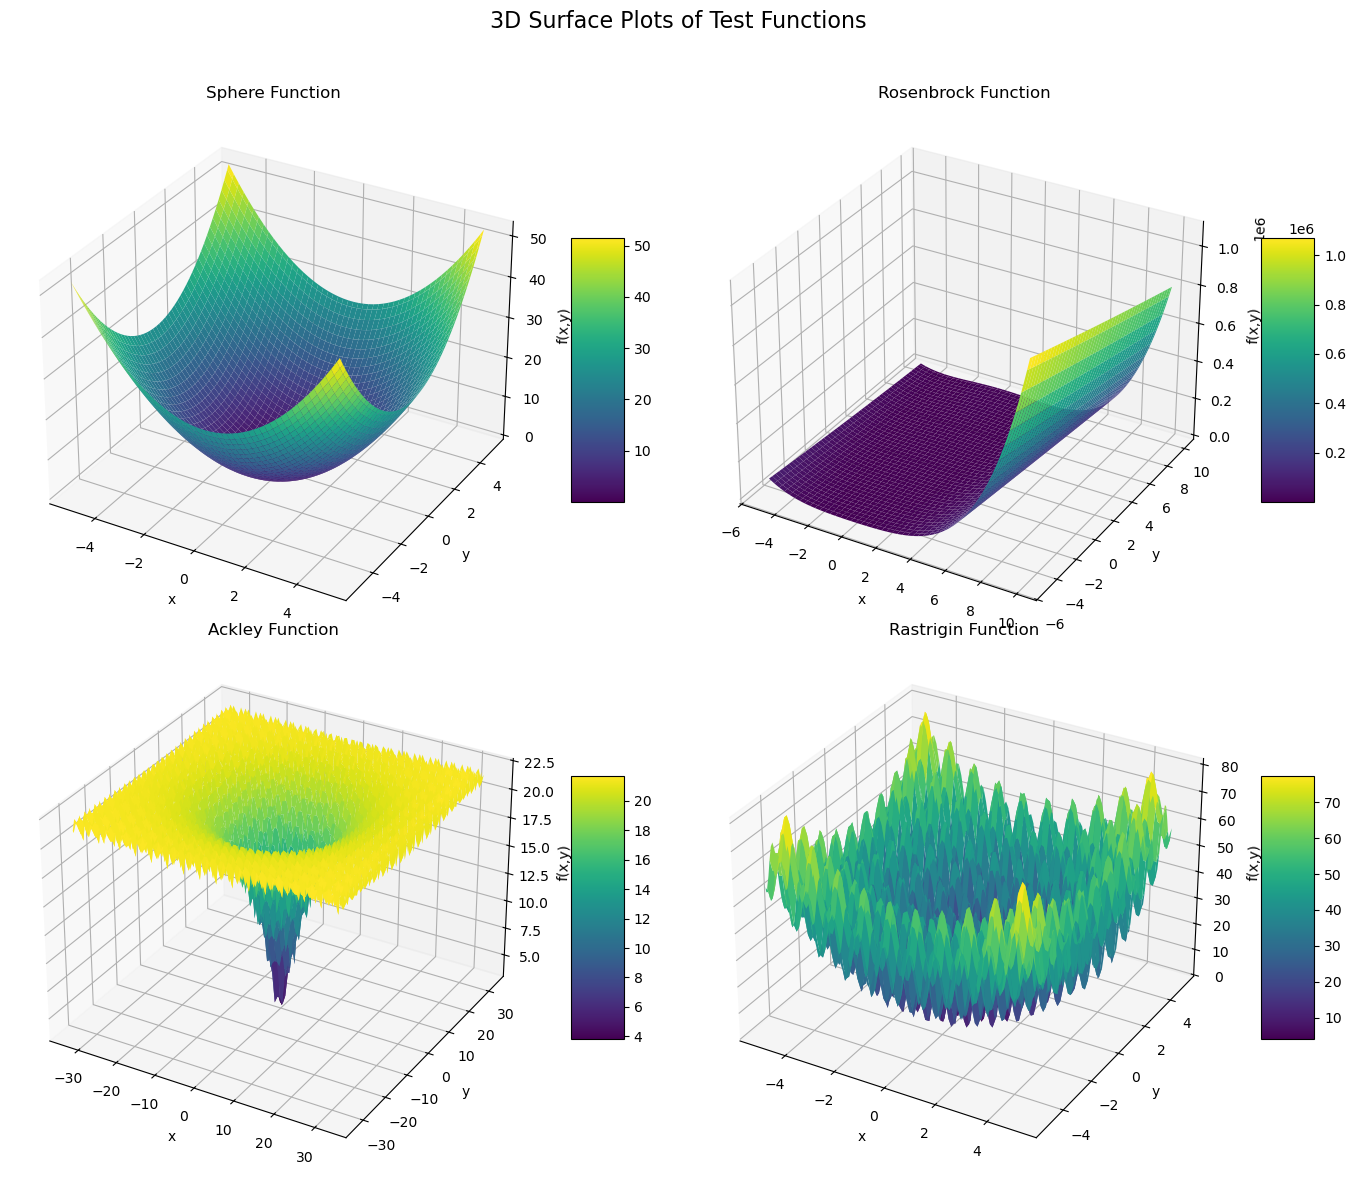

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions in 2D for visualization (still 2D input for 3D plotting)
def sphere(x, y):
    return x**2 + y**2

def rosenbrock(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

def ackley(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - \
           np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + 20 + np.e

def rastrigin(x, y):
    return 20 + x**2 + y**2 - 10 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))

# Create meshgrid for plotting
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)

# Calculate function values
functions = {
    'Sphere': sphere(X, Y),
    'Rosenbrock': rosenbrock(X, Y),
    'Ackley': ackley(X, Y),
    'Rastrigin': rastrigin(X, Y)
}

# Adjust domains for specific functions
x_rosen = np.linspace(-5, 10, 100)
y_rosen = np.linspace(-5, 10, 100)
X_rosen, Y_rosen = np.meshgrid(x_rosen, y_rosen)
functions['Rosenbrock'] = rosenbrock(X_rosen, Y_rosen)

x_ack = np.linspace(-32.768, 32.768, 100)
y_ack = np.linspace(-32.768, 32.768, 100)
X_ack, Y_ack = np.meshgrid(x_ack, y_ack)
functions['Ackley'] = ackley(X_ack, Y_ack)

# Create subplots
fig = plt.figure(figsize=(14, 12))
fig.suptitle('3D Surface Plots of Test Functions', fontsize=16)

# Plot each function in 3D
for i, (name, Z) in enumerate(functions.items(), 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    
    if name == 'Rosenbrock':
        surf = ax.plot_surface(X_rosen, Y_rosen, Z, cmap='viridis', edgecolor='none')
    elif name == 'Ackley':
        surf = ax.plot_surface(X_ack, Y_ack, Z, cmap='viridis', edgecolor='none')
    else:
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    
    ax.set_title(f'{name} Function')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

## Solving the test funciton using PSO and GA

Running optimizations...


Functions: 100%|██████████| 4/4 [00:24<00:00,  6.08s/it]



Results (average fitness over 4 runs):

Function    | PSO Mean (Std)    | GA Mean (Std)
--------------------------------------------------
sphere      |     0.000000 (0.000000) |     0.000000 (0.000000)
rosenbrock  |     0.779942 (0.148600) |     1.182118 (1.019840)
ackley      |     0.000001 (0.000001) |     0.028667 (0.011680)
rastrigin   |     0.663425 (0.469112) |     0.001465 (0.001020)

Comparison with Optimal Values (Distance from optimum = 0.0):

Function    | PSO Distance (Std) | GA Distance (Std) | PSO % Error | GA % Error
--------------------------------------------------------------------------------
sphere      |     0.000000 (0.000000) |     0.000000 (0.000000) |      0.00% |      0.00%
rosenbrock  |     0.779942 (0.148600) |     1.182118 (1.019840) |     77.99% |    118.21%
ackley      |     0.000001 (0.000001) |     0.028667 (0.011680) |      0.00% |      2.87%
rastrigin   |     0.663425 (0.469112) |     0.001465 (0.001020) |     66.34% |      0.15%


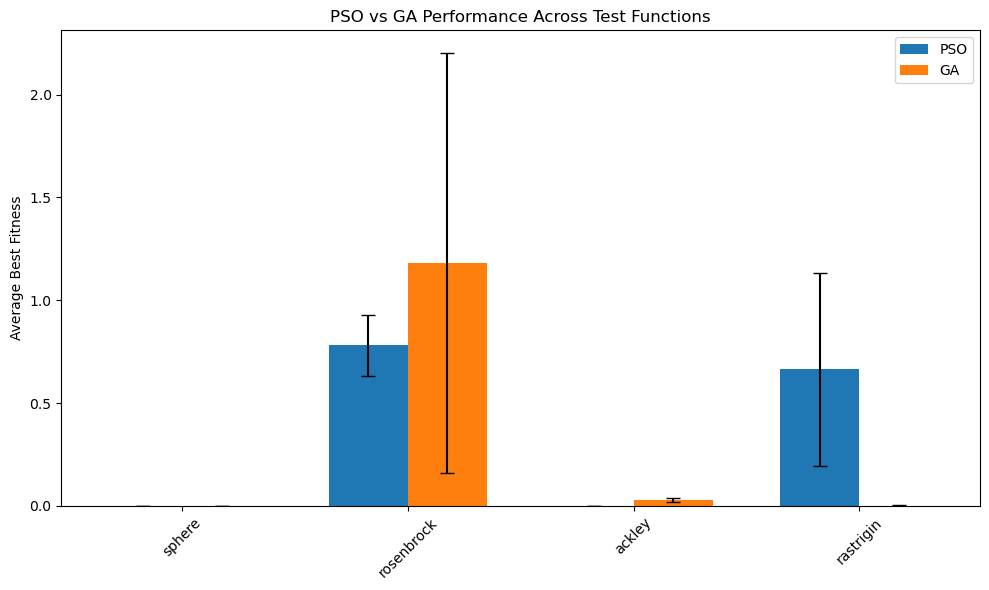

In [3]:
import numpy as np
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.optimize import minimize
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define parameters
n_particles = 10
n_iterations = 500
n_dimensions = 5
n_runs = 3

# Test functions and their optimal values
problems = {
    "sphere": {"problem": get_problem("sphere", n_var=n_dimensions), "optimum": 0.0},
    "rosenbrock": {"problem": get_problem("rosenbrock", n_var=n_dimensions), "optimum": 0.0},
    "ackley": {"problem": get_problem("ackley", n_var=n_dimensions), "optimum": 0.0},
    "rastrigin": {"problem": get_problem("rastrigin", n_var=n_dimensions), "optimum": 0.0}
}

# Initialize algorithms
pso = PSO(pop_size=n_particles, max_iter=n_iterations)
ga = GA(pop_size=n_particles, max_gen=n_iterations)

def run_optimization(algorithm, problem, n_runs, algo_name, prob_name):
    results = []
    # Use tqdm to show progress for each run
    for _ in tqdm(range(n_runs), desc=f"{algo_name} on {prob_name}", leave=False):
        result = minimize(
            problem,
            algorithm,
            termination=('n_gen', n_iterations),
            verbose=False
        )
        results.append(result.F[0])
    return np.mean(results), np.std(results)

# Store results
results_pso = {}
results_ga = {}
stats_pso = {}
stats_ga = {}

# Run experiments with progress bars
print("Running optimizations...")
for name in tqdm(problems.keys(), desc="Functions"):
    # Run PSO
    mean_pso, std_pso = run_optimization(pso, problems[name]["problem"], n_runs, "PSO", name)
    results_pso[name] = mean_pso
    stats_pso[name] = (mean_pso, std_pso)
    
    # Run GA
    mean_ga, std_ga = run_optimization(ga, problems[name]["problem"], n_runs, "GA", name)
    results_ga[name] = mean_ga
    stats_ga[name] = (mean_ga, std_ga)

# Print results - Basic comparison
print("\nResults (average fitness over 4 runs):")
print("\nFunction    | PSO Mean (Std)    | GA Mean (Std)")
print("-" * 50)
for name in problems.keys():
    pso_mean, pso_std = stats_pso[name]
    ga_mean, ga_std = stats_ga[name]
    print(f"{name:11} | {pso_mean:12.6f} ({pso_std:.6f}) | {ga_mean:12.6f} ({ga_std:.6f})")

# Print comparison with optimal values
print("\nComparison with Optimal Values (Distance from optimum = 0.0):")
print("\nFunction    | PSO Distance (Std) | GA Distance (Std) | PSO % Error | GA % Error")
print("-" * 80)
for name in problems.keys():
    pso_mean, pso_std = stats_pso[name]
    ga_mean, ga_std = stats_ga[name]
    optimum = problems[name]["optimum"]
    
    pso_dist = abs(pso_mean - optimum)
    ga_dist = abs(ga_mean - optimum)
    
    pso_error = pso_dist * 100 if optimum == 0 else (pso_dist / abs(optimum)) * 100
    ga_error = ga_dist * 100 if optimum == 0 else (ga_dist / abs(optimum)) * 100
    
    print(f"{name:11} | {pso_dist:12.6f} ({pso_std:.6f}) | {ga_dist:12.6f} ({ga_std:.6f}) | {pso_error:9.2f}% | {ga_error:9.2f}%")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(problems))
width = 0.35

pso_means = [results_pso[name] for name in problems.keys()]
ga_means = [results_ga[name] for name in problems.keys()]
pso_stds = [stats_pso[name][1] for name in problems.keys()]
ga_stds = [stats_ga[name][1] for name in problems.keys()]

ax.bar(x - width/2, pso_means, width, yerr=pso_stds, label='PSO', capsize=5)
ax.bar(x + width/2, ga_means, width, yerr=ga_stds, label='GA', capsize=5)

ax.set_ylabel('Average Best Fitness')
ax.set_title('PSO vs GA Performance Across Test Functions')
ax.set_xticks(x)
ax.set_xticklabels(problems.keys())
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()